In [1]:
# Hourly 
# URL = https://my.elexys.be/MarketInformation/SpotBelpex.aspx
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [2]:
url = 'https://my.elexys.be/MarketInformation/SpotBelpex.aspx'
page = requests.get(url)
page_content = page.content
soup = BeautifulSoup(page_content,'html.parser')
tabl = soup.find_all("table", {"class" : "dxgvControl_Office2010Blue dxgv"})


In [58]:
data_raw = []
for t in tabl:
    rows = t.find_all("tr")
    for row in rows:
        data_raw.append(row.get_text(separator = '').split("€"))

        
data_cleaned = []
for i in range(len(data_raw)):
    if len(data_raw[i]) == 2:
        data_cleaned.append(data_raw[i])
    
    
df = pd.DataFrame.from_records(data_cleaned)
df = df.replace(r'\n',' ', regex=True) 
df = df.replace(r',', '.', regex = True)
df[1] = df[1].astype(float)
df


,0,1
0,7/07/2020 23:00:00,37.00
1,7/07/2020 22:00:00,40.15
2,7/07/2020 21:00:00,40.10
3,7/07/2020 20:00:00,40.84
4,7/07/2020 19:00:00,40.70
...,...,...
187,30/06/2020 4:00:00,16.60
188,30/06/2020 3:00:00,15.88
189,30/06/2020 2:00:00,16.37
190,30/06/2020 1:00:00,16.15


In [59]:
type(df[1][0])

numpy.float64

In [60]:
df[1]

0      37.00
1      40.15
2      40.10
3      40.84
4      40.70
       ...  
187    16.60
188    15.88
189    16.37
190    16.15
191    17.82
Name: 1, Length: 192, dtype: float64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       192 non-null    object 
 1   1       192 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [62]:
df.columns = ['Date', 'Price']

In [63]:
pd.to_datetime(df['Date'], infer_datetime_format=True)

0     2020-07-07 23:00:00
1     2020-07-07 22:00:00
2     2020-07-07 21:00:00
3     2020-07-07 20:00:00
4     2020-07-07 19:00:00
              ...        
187   2020-06-30 04:00:00
188   2020-06-30 03:00:00
189   2020-06-30 02:00:00
190   2020-06-30 01:00:00
191   2020-06-30 00:00:00
Name: Date, Length: 192, dtype: datetime64[ns]

In [64]:
df.set_index(df['Date'])

,Date,Price
Date,,
7/07/2020 23:00:00,7/07/2020 23:00:00,37.00
7/07/2020 22:00:00,7/07/2020 22:00:00,40.15
7/07/2020 21:00:00,7/07/2020 21:00:00,40.10
7/07/2020 20:00:00,7/07/2020 20:00:00,40.84
7/07/2020 19:00:00,7/07/2020 19:00:00,40.70
...,...,...
30/06/2020 4:00:00,30/06/2020 4:00:00,16.60
30/06/2020 3:00:00,30/06/2020 3:00:00,15.88
30/06/2020 2:00:00,30/06/2020 2:00:00,16.37


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    192 non-null    object 
 1   Price   192 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [66]:
df = df.set_index(pd.DatetimeIndex(df['Date']))

In [67]:
del df['Date']

In [71]:
df.index

DatetimeIndex(['2020-07-07 23:00:00', '2020-07-07 22:00:00',
               '2020-07-07 21:00:00', '2020-07-07 20:00:00',
               '2020-07-07 19:00:00', '2020-07-07 18:00:00',
               '2020-07-07 17:00:00', '2020-07-07 16:00:00',
               '2020-07-07 15:00:00', '2020-07-07 14:00:00',
               ...
               '2020-06-30 09:00:00', '2020-06-30 08:00:00',
               '2020-06-30 07:00:00', '2020-06-30 06:00:00',
               '2020-06-30 05:00:00', '2020-06-30 04:00:00',
               '2020-06-30 03:00:00', '2020-06-30 02:00:00',
               '2020-06-30 01:00:00', '2020-06-30 00:00:00'],
              dtype='datetime64[ns]', name='Date', length=192, freq=None)

In [75]:
df.head(100)

,Price
Date,
2020-07-07 23:00:00,37.00
2020-07-07 22:00:00,40.15
2020-07-07 21:00:00,40.10
2020-07-07 20:00:00,40.84
2020-07-07 19:00:00,40.70
...,...
2020-04-07 00:00:00,26.42
2020-03-07 23:00:00,27.62
2020-03-07 22:00:00,34.25


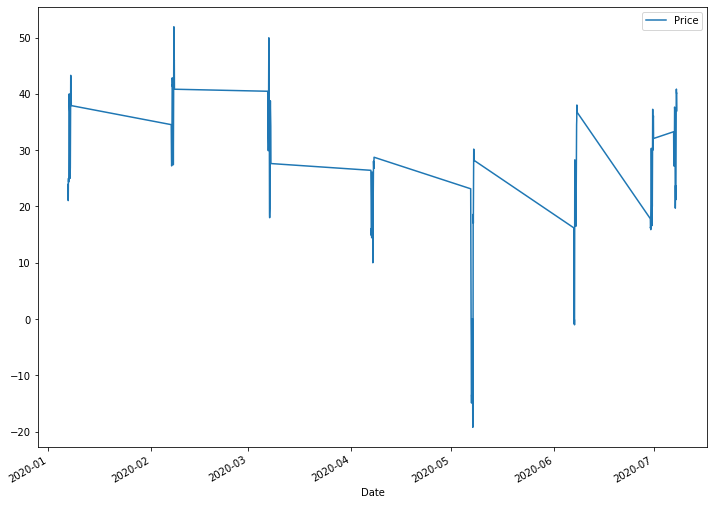

In [70]:
df.plot(figsize=(12,9))